### 1.DEEPONET的训练数据生成及保存

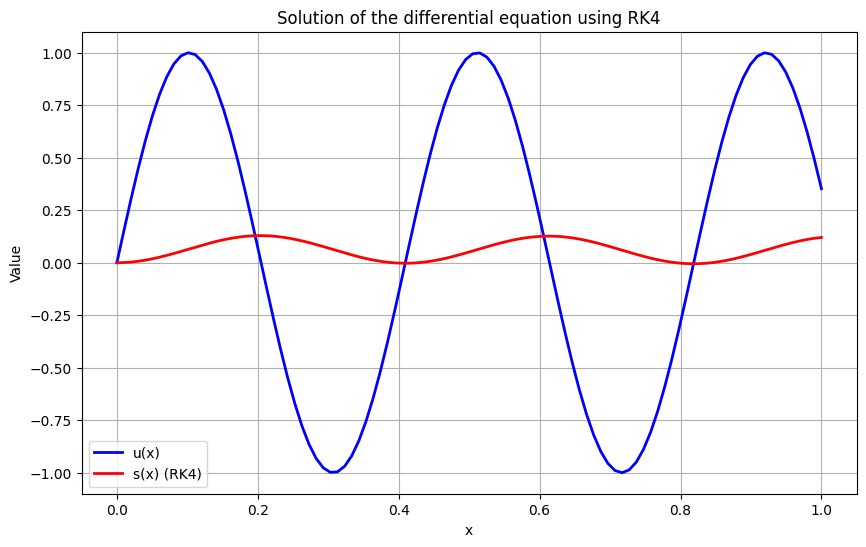

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 微分方程的右侧，即 f(x, s) = -s^2 + u(x)
def f(x, s, u_func):
    return -s**2 + u_func(x)

# 使用RK4方法求解微分方程
def runge_kutta_4(f, u_func, x, s0, h):
    # 初始化解
    s = np.zeros_like(x)
    s[0] = s0  # 初始条件 s(0) = s0
    
    # RK4迭代
    for i in range(1, len(x)):
        # 计算每一步的k1, k2, k3, k4
        k1 = h * f(x[i-1], s[i-1], u_func)
        k2 = h * f(x[i-1] + h/2, s[i-1] + k1/2, u_func)
        k3 = h * f(x[i-1] + h/2, s[i-1] + k2/2, u_func)
        k4 = h * f(x[i-1] + h, s[i-1] + k3, u_func)
        
        # 更新解
        s[i] = s[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return s

# 1. 数据生成
def generate_data(num_samples=1, m_points=10, n_points=20):
    data_u = []
    data_s = []
    x_u = np.linspace(0, 1, m_points)  # Domain for U
    x_s = np.linspace(0, 1, n_points)  # Domain for S (might differ from U)

    for _ in range(num_samples):
        # 生成一个随机的输入函数 U(x)，这里使用 sin 函数并引入随机扰动
        random = np.random.uniform(0.5, 4.0)
        u = np.sin(2 * np.pi * x_u * random)
        
        # 使用插值来确保 u(x) 在 x_s 中有有效的值
        u_func = lambda x: np.sin(2 * np.pi * x * random)

        # 使用RK4方法求解S(x)
        s = runge_kutta_4(f, u_func, x_s, s0=0, h=(x_s[1] - x_s[0]))
        
        data_u.append(u)
        data_s.append(s)

    return np.array(data_u), np.array(data_s), x_u, x_s

# 生成数据
num_samples = 1  # 样本数量
m_points = 100    # U函数的点数
n_points = 200    # 解S的点数

u_data, s_data, x_u, x_s = generate_data(num_samples, m_points, n_points)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_u, u_data[0], label='u(x)', color='blue', linewidth=2)
plt.plot(x_s, s_data[0], label='s(x) (RK4)', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.title('Solution of the differential equation using RK4')
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import os

# 微分方程的右侧，即 f(x, s) = -s^2 + u(x)
def f(x, s, u_func):
    return -s**2 + u_func(x)

# 使用RK4方法求解微分方程
def runge_kutta_4(f, u_func, x, s0, h):
    # 初始化解
    s = np.zeros_like(x)
    s[0] = s0  # 初始条件 s(0) = s0
    
    # RK4迭代
    for i in range(1, len(x)):
        # 计算每一步的k1, k2, k3, k4
        k1 = h * f(x[i-1], s[i-1], u_func)
        k2 = h * f(x[i-1] + h/2, s[i-1] + k1/2, u_func)
        k3 = h * f(x[i-1] + h/2, s[i-1] + k2/2, u_func)
        k4 = h * f(x[i-1] + h, s[i-1] + k3, u_func)
        
        # 更新解
        s[i] = s[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return s

# 1. 数据生成
def generate_data(x_u, x_s, num_samples=1, output_dir='./'):
    # 确保输出目录存在，如果没有则创建它
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for idx in range(num_samples):
        # 生成一个随机的输入函数 U(x)，这里使用 sin 函数并引入随机扰动
        random = np.random.uniform(0.5, 4.0)
        u = np.sin(2 * np.pi * x_u * random)
        
        # 使用插值来确保 u(x) 在 x_s 中有有效的值
        u_func = lambda x: np.sin(2 * np.pi * x * random)
        
        # 使用RK4方法求解S(x)
        s = runge_kutta_4(f, u_func, x_s, s0=0, h=(x_s[1] - x_s[0]))

        # 保存为 .npz 文件，原始数据不会被更改
        npz_filename = os.path.join(output_dir, f'raw_data_{idx+1}.npz')
        np.savez(npz_filename, x_u=x_u, u=u, x_s=x_s, s=s)
        
        print(f"Saved: {npz_filename}")

# 生成数据并保存
x_u = np.linspace(0, 1, 100)  # U 函数的 x 值
x_s = np.linspace(0, 1, 200)  # S 函数的 x 值
num_samples = 100  # 样本数量
output_dir = './raw_data_files'  # 保存 .npz 文件的目录

generate_data(x_u, x_s, num_samples, output_dir)


Saved: ./raw_data_files\raw_data_1.npz
Saved: ./raw_data_files\raw_data_2.npz
Saved: ./raw_data_files\raw_data_3.npz
Saved: ./raw_data_files\raw_data_4.npz
Saved: ./raw_data_files\raw_data_5.npz
Saved: ./raw_data_files\raw_data_6.npz
Saved: ./raw_data_files\raw_data_7.npz
Saved: ./raw_data_files\raw_data_8.npz
Saved: ./raw_data_files\raw_data_9.npz
Saved: ./raw_data_files\raw_data_10.npz
Saved: ./raw_data_files\raw_data_11.npz
Saved: ./raw_data_files\raw_data_12.npz
Saved: ./raw_data_files\raw_data_13.npz
Saved: ./raw_data_files\raw_data_14.npz
Saved: ./raw_data_files\raw_data_15.npz
Saved: ./raw_data_files\raw_data_16.npz
Saved: ./raw_data_files\raw_data_17.npz
Saved: ./raw_data_files\raw_data_18.npz
Saved: ./raw_data_files\raw_data_19.npz
Saved: ./raw_data_files\raw_data_20.npz
Saved: ./raw_data_files\raw_data_21.npz
Saved: ./raw_data_files\raw_data_22.npz
Saved: ./raw_data_files\raw_data_23.npz
Saved: ./raw_data_files\raw_data_24.npz
Saved: ./raw_data_files\raw_data_25.npz
Saved: ./

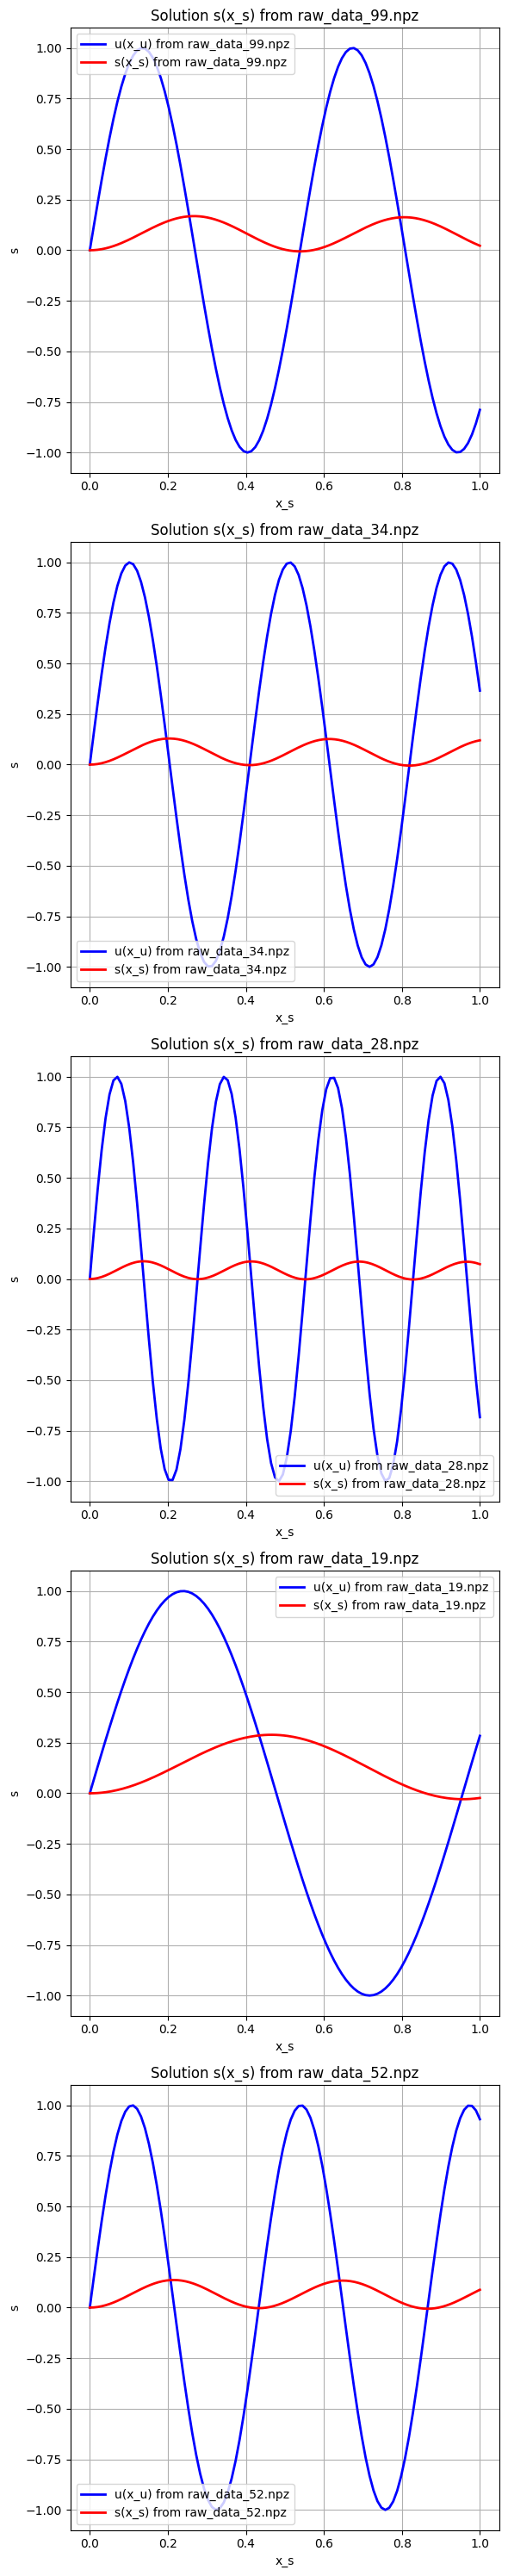

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# 定义读取和绘制函数
def read_and_plot_random_npz_files(directory, num_files=5):
    # 获取目录下所有的 .npz 文件
    npz_files = [f for f in os.listdir(directory) if f.endswith('.npz')]
    
    # 随机选择 num_files 个文件
    selected_files = random.sample(npz_files, num_files)

    # 创建一个画布，用来显示多个图像
    plt.figure(figsize=(6, 30))

    # 遍历每个选择的文件
    for idx, file in enumerate(selected_files):
        # 构建文件的完整路径
        file_path = os.path.join(directory, file)
        
        # 读取 .npz 文件
        data = np.load(file_path)

        # 提取数据
        x_u = data['x_u']
        u = data['u']
        x_s = data['x_s']
        s = data['s']
        
        # 创建子图
        plt.subplot(num_files, 1, idx + 1)  # 创建多行1列的子图
        plt.plot(x_u, u, label=f'u(x_u) from {file}', color='blue', linewidth=2)
        plt.xlabel('x_u')
        plt.ylabel('u')
        plt.title(f'Function u(x_u) from {file}')
        plt.grid(True)
        plt.legend()

        plt.plot(x_s, s, label=f's(x_s) from {file}', color='red', linewidth=2)
        plt.xlabel('x_s')
        plt.ylabel('s')
        plt.title(f'Solution s(x_s) from {file}')
        plt.grid(True)
        plt.legend()
    
    # 调整布局，防止标签重叠
    plt.tight_layout()
    plt.show()

# 调用函数，随机选择并读取文件绘制
directory = './raw_data_files'  # 文件夹路径，确保此文件夹中有 .npz 文件
read_and_plot_random_npz_files(directory)


## 2.DEEPONET模型构建

#### 2.1数据加载：